In [1]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd

# Make sure the file path is correct, if the file is in the same folder, just use the filename
df = pd.read_csv('/content/Iris.csv')

# Preview the first 5 rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
import sqlite3

conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()

# Query to list all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in database:", tables)

conn.close()

Tables in database: [('Iris',)]


In [8]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('database.sqlite')

df = pd.read_sql_query("SELECT * FROM iris;", conn)

print(df.head())

conn.close()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Drop the 'Id' column (not useful for ML)
df = df.drop(columns=['Id'])

# Step 2: Encode 'Species' column into numeric labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Step 3: Separate features (X) and target (y)
X = df.drop(columns=['Species'])
y = df['Species']

# Step 4: Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled is a numpy array, y is a pandas Series
print("Features after scaling:\n", X_scaled[:5])
print("Labels:\n", y[:5].values)

Features after scaling:
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
Labels:
 [0 0 0 0 0]


In [10]:
import pandas as pd

# Assuming df is already loaded and 'Id' column dropped

# Create new features
df['PetalArea'] = df['PetalLengthCm'] * df['PetalWidthCm']
df['SepalArea'] = df['SepalLengthCm'] * df['SepalWidthCm']
df['PetalSepalLengthRatio'] = df['PetalLengthCm'] / df['SepalLengthCm']
df['PetalSepalWidthRatio'] = df['PetalWidthCm'] / df['SepalWidthCm']

# Encode the target label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Separate features and target
X = df.drop(columns=['Species'])
y = df['Species']

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features after engineering and scaling:\n", X_scaled[:5])

Features after engineering and scaling:
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673 -1.17356615  0.01294635
  -1.43411565 -1.355671  ]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673 -1.17356615 -0.92526712
  -1.38736462 -1.31924104]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673 -1.17782349 -0.82399963
  -1.42541201 -1.33517915]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673 -1.1693088  -1.05631916
  -1.21890846 -1.32746716]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673 -1.17356615  0.05762319
  -1.41120765 -1.36174266]]


In [11]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris.data      # Features
y = iris.target    # Target labels

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows after scaling:\n", X_scaled[:5])

First 5 rows after scaling:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [13]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Iris dataset

# Step 2: Normalize features

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Create and train KNN classifier (choose K=3 for example)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate accuracy and confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy with K=3: {acc:.2f}")
print("Confusion Matrix:")
print(cm)

Accuracy with K=3: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


K=1 -> Accuracy: 0.978
K=2 -> Accuracy: 0.978
K=3 -> Accuracy: 1.000
K=4 -> Accuracy: 0.978
K=5 -> Accuracy: 1.000
K=6 -> Accuracy: 1.000
K=7 -> Accuracy: 1.000
K=8 -> Accuracy: 1.000
K=9 -> Accuracy: 1.000
K=10 -> Accuracy: 1.000
K=11 -> Accuracy: 1.000
K=12 -> Accuracy: 1.000
K=13 -> Accuracy: 1.000
K=14 -> Accuracy: 1.000
K=15 -> Accuracy: 1.000
K=16 -> Accuracy: 1.000
K=17 -> Accuracy: 1.000
K=18 -> Accuracy: 0.978
K=19 -> Accuracy: 1.000
K=20 -> Accuracy: 1.000


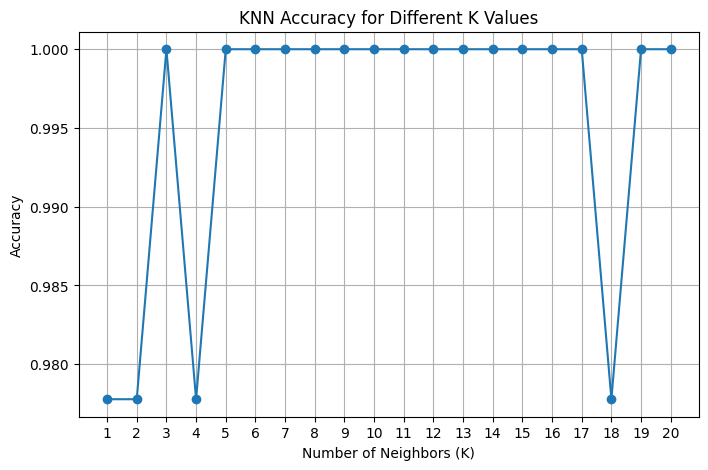

In [14]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Test different K values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.3f}")

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Accuracy (K=5): 1.000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


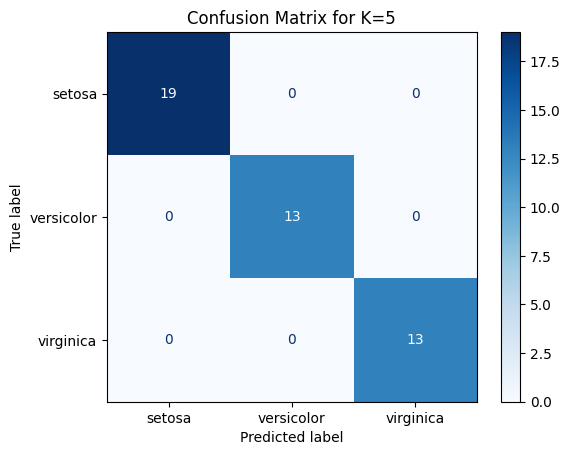

In [15]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train KNN with chosen K
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (K={k}): {acc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for K={k}')
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Train KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Create mesh grid to plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.Paired)
plt.title(f"KNN Decision Boundary (K={k})")
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.show()

ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

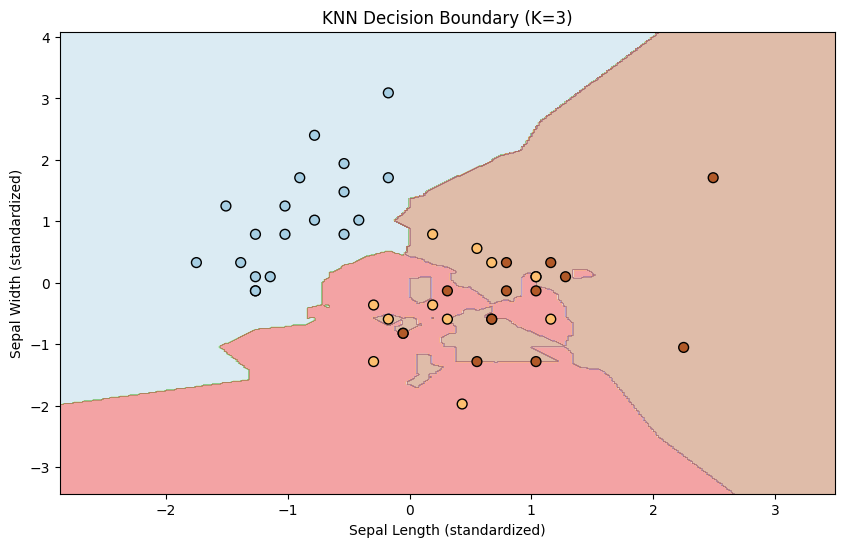

In [18]:
# Use only 2 features for training and visualization
X = iris.data[:, :2]  # SepalLength, SepalWidth
y = iris.target

# Normalize and split as before
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Then you can run the same mesh grid and prediction steps as before


# Create mesh grid to plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', cmap=plt.cm.Paired)
plt.title(f"KNN Decision Boundary (K={k})")
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.show()